## 패키지 준비

In [ ]:
%pip install matplotlib
%pip install scikit-learn

## 샘플 데이터 준비

In [1]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
                         21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
                         23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
                         27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
                         39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
                         44.0])
       
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
                         115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
                         150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
                         218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
                         556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
                         850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
                         1000.0])

In [3]:
print(perch_length.shape)
print(perch_weight.shape)

(56,)
(56,)


## 산점도 출력

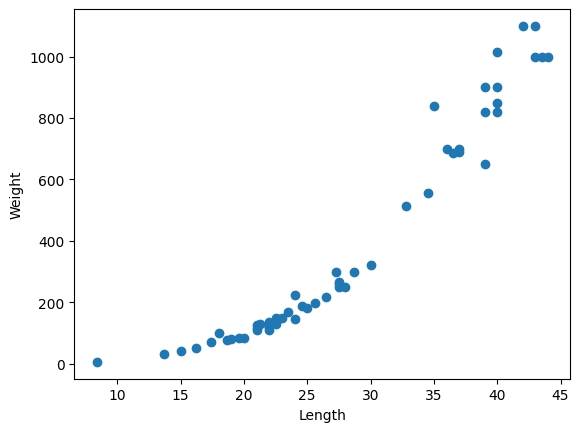

In [4]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

## 훈련 세트, 테스트 세트 나누기 (무작위) 

In [11]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_answer, test_answer = train_test_split(perch_length, perch_weight)

In [12]:
print(train_input.shape)
print(test_input.shape)

(42,)
(14,)


## 테스트 세트, 훈련 세트를 2차원 배열 형식으로 변환

In [18]:
train_input = train_input.reshape(-1, 1)    ## 행: 자동, 열: 1
test_input = test_input.reshape(-1, 1)      ## 행: 자동, 열: 1

print(train_input.shape)
print(test_input.shape)

(42, 1)
(14, 1)


## K-NR 모델 훈련 및 정확도(R^2) 측정

In [19]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_answer)
print(knr.score(test_input, test_answer))
print(knr.score(train_input, train_answer))

0.9357176676452077
0.9854374016353333


## 평균 절대값 오차(MAE) 계산

In [7]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_answer, test_prediction)
print(mae)

45.91428571428571


## K-NR 모델 훈련 및 정확도(R^2) 측정 (과소적합 해결)

In [8]:
knr.n_neighbors = 3

knr.fit(train_input, train_answer)
print(knr.score(train_input, train_answer))
print(knr.score(test_input, test_answer))

0.9864619144054896
0.9518262671881051


## 새로운 데이터로 모델 성능 테스트

In [9]:
new_fish = [15.0]
print(knr.predict([new_fish]))

[41.16666667]
